In [2]:
%matplotlib inline

Path(array([[0., 0.],
       [1., 0.],
       [1., 1.]]), array([1, 3, 3], dtype=uint8))


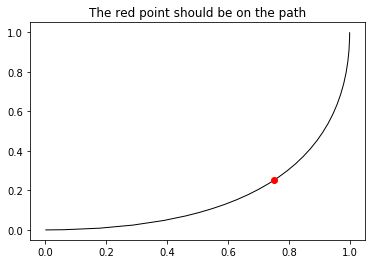

In [50]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np


Path = mpath.Path

fig, ax = plt.subplots()
pp1 = mpatches.PathPatch(
    Path([(0, 0), (1, 0), (1, 1)],
         [Path.MOVETO, Path.CURVE3, Path.CURVE3]),
    fc="none", transform=ax.transData)
ax.add_patch(pp1)

print(pp1.get_path())

ax.plot([0.75], [0.25], "ro")
ax.set_title('The red point should be on the path')

plt.show()

https://matplotlib.org/3.1.0/gallery/shapes_and_collections/quad_bezier.html

In [181]:
def quadBrezPoints(P0, P1, P2, nSamples):
    ans = np.zeros((nSamples,2))
    for i in range(nSamples):
        t = (i+0.0)/nSamples
        ans[i,0] = (1-t)**2 * P0[0] + 2*(1-t)*t*P1[0] + t**2 * P2[0]
        ans[i,1] = (1-t)**2 * P0[1] + 2*(1-t)*t*P1[1] + t**2 * P2[1]
    return ans

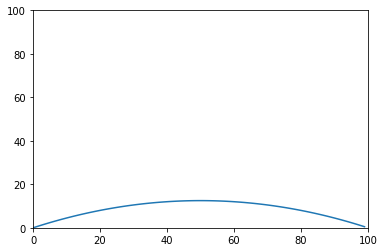

In [182]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

bezier_seg = quadBrezPoints((0, 0),(50,25),(100,0), 100)
plt.axis([0,100,0,100])
plt.plot(*zip(*bezier_seg))

https://en.wikipedia.org/wiki/B%C3%A9zier_curve

In [395]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

def get_p1(p0,p2):
    x0, y0 = p0
    x2, y2 = p2
    
    #middle_point
    mid_x = (x0 + x2) / 2
    mid_y = (y0 + y2) / 2
    
    vector_x = x2 - x0
    vector_y = y2 - y0
    
    clockwise_90_vector_x = vector_y
    clockwise_90_vector_y = - vector_x
    
    x1 = mid_x + clockwise_90_vector_x / 2
    y1 = mid_y + clockwise_90_vector_y / 2
    
    return (x1,y1)
    
def one_grad_quad_bezier(p0,p1,p2,color='RdYlGn',linewidth=5):
    x,y = zip(p0,p1,p2)
    
    cmap = plt.get_cmap(color)
    num_color = cmap.N
    bezier_points = quadBrezPoints(p0,p1,p2, num_color+1)
    segments = np.concatenate([bezier_points[:-1], bezier_points[1:]], axis=1)
    segments = segments.reshape(num_color,2,2)
    dydx = np.arange(num_color)

    lc = LineCollection(segments, cmap=cmap, linewidth = linewidth)
    lc.set_array(dydx)
    fig = plt.figure()
    ax=fig.add_subplot(111)
    line = ax.add_collection(lc)
    cbar = fig.colorbar(line, ax=ax)
    cbar.set_ticks([0,num_color-1])
    cbar.set_ticklabels(["Origin","Destination"])
    ax.set_xlim(min(x),max(x))
    ax.set_ylim(min(y),max(y));

# fig = plt.figure()
# ax=fig.add_subplot(111) 
def grad_quad_bezier(p0, p1 ,p2 ,ax,color='RdYlGn',linewidth=5):
    x,y = zip(p0,p1,p2)
    
    cmap = plt.get_cmap(color)
    num_color = cmap.N
    bezier_points = quadBrezPoints(p0,p1,p2, num_color+1)
    segments = np.concatenate([bezier_points[:-1], bezier_points[1:]], axis=1)
    segments = segments.reshape(num_color,2,2)
    dydx = np.arange(num_color)

    lc = LineCollection(segments, cmap=cmap, linewidth = linewidth)
    lc.set_array(dydx)
    line = ax.add_collection(lc)
# cbar = fig.colorbar(line, ax=ax)
# cbar.set_ticks([0,num_color-1])
# cbar.set_ticklabels(["Origin","Destination"])
# ax.set_xlim(min(x),max(x))
# ax.set_ylim(min(y),max(y));

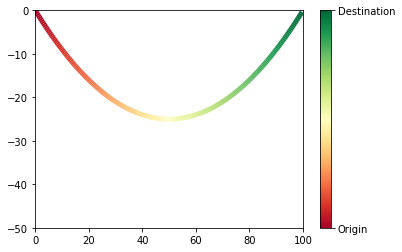

In [396]:
p0=(0,0)
p2=(100,0)
p1=get_p1(p0,p2)
one_grad_quad_bezier(p0,p1,p2)